<a href="https://colab.research.google.com/github/Afsah-Hyder/CV_recitation/blob/main/CV_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#For Q3.
# Specify the proportion of data for the validation set (e.g., 20%)
test_size = 0.2

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train, test_size=test_size, random_state=42
)

170498071/170498071 [==============================] - 4s 0us/step


**CIFAR-10 Dataset:** The dataset contains 60,000 32x32 color (rgb) images categorized into 10 classes. It is a well-known benchmark dataset utilized for training and assessing machine learning algorithms, especially those designed for image recognition. Out of these 60,000 images, 50k are reserved for training and the remaining 10k for test. The 10 classes are: airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each class contains 6k images.


**Preprocessing steps:** In the preprocessing phase of image data, various steps are undertaken to optimize the image for analysis. These steps encompass noise reduction, contrast enhancement, image resizing, color correction, segmentation, feature extraction, among others. Noise reduction methodologies focus on eliminating unwanted elements, such as variations in lighting, while preserving the image's crucial characteristics. Contrast enhancement procedures are employed to heighten the distinction between different features within the image. Image resizing and color correction techniques play roles in adjusting the image's dimensions and color balance, respectively. Segmentation approaches divide the image into distinct regions based on its content, and feature extraction methods identify and extract important features. This preprocessing is vital in image analysis, contributing to improved data quality and reduced visual clutter.

**Q2.**

In [ ]:
import numpy as np
def calc(input,filter,padds,padding):
  if padding:
    input=np.pad(input,(padds, padds), constant_values=0)  # diff options available if different type of padding required along diff axis
  output=np.zeros((len(input)-2*padds,len(input)-2*padds))
  for i in range(padds,len(input)-padds):
    for j in range(padds,len(input[i])-padds):
      sum=input[i][j]*filter[padds][padds]
      for k in range(1,padds+1):
        sum+= input[i-k][j-k]*filter[padds-k][padds-k]+ input[i-k][j]*filter[padds-k][padds]+ input[i][j-k]*filter[padds][padds-k]+ input[i+k][j-k]*filter[padds+k][padds-k]+ input[i+k][j]*filter[padds+k][padds]+ input[i][j+k]*filter[padds][padds+k]+ input[i-k][j+k]*filter[padds-k][padds+k]+ input[i+k][j+k]*filter[padds+k][padds+k]
      output[i-padds][j-padds]=sum
  return output


def filt(input,filter,padding,normalization):
  if normalization: filter=filter/np.sum(filter)
  filter_num=len(filter)
  padds=int((filter_num-1)/2)    #pad width

  if input.ndim==3:
    output_0=calc(input[0],filter,padds,padding)
    output_1=calc(input[1],filter,padds,padding)
    output_2=calc(input[2],filter,padds,padding)

    for i in range(0,len(output_0)):
      for j in range(0,len(output_0)):
        output_0[i][j]=output_0[i][j]+output_1[i][j]+output_2[i][j]
    return output_0
  elif input.ndim==2:
    output=calc(input,filter,padds,padding)
    return output



def printer(output):
  for i in range(len(output)):
    for j in range(len(output[i])):
      print(output[i][j], ", ")
    print("\n")

filter=np.ones((3,3))
image3=np.array([[[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]],[[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]],[[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]]]) #3D
image2=np.array([[3,4,12,2,5],[3,14,27,20,15],[3,14,12,21,25],[2,3,7,8,9],[2,3,6,4,11]])   #2D

output=filt(image3,filter,1,0)
printer(output)




72.0 , 
189.0 , 
237.0 , 
243.0 , 
126.0 , 


123.0 , 
276.0 , 
378.0 , 
417.0 , 
264.0 , 


117.0 , 
255.0 , 
378.0 , 
432.0 , 
294.0 , 


81.0 , 
156.0 , 
234.0 , 
309.0 , 
234.0 , 


30.0 , 
69.0 , 
93.0 , 
135.0 , 
96.0 , 




**Q3.**

In [ ]:
from skimage.feature import local_binary_pattern, hog
import cv2
from sklearn.svm import SVC
from os import listdir
from google.colab.patches import cv2_imshow
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
def get_hog_data(x_images, y_gt , width, height, orient = 9, pixelsxcell = (12, 12), cellsxblock = (3, 3)):

    # Define the feature vector size
    # Feature size = ((image rows / cell size (rows)) - (Cells per block (rows) -1))*
    #                 (image cols / cell size (cols)) - (Cells per block (cols) -1))*
    #                 (Cells per block (rows) * Cells per block (cols) * Orientations)
    feature_size = int(np.trunc((height/pixelsxcell[0])-(cellsxblock[0]-1))*np.trunc((width/pixelsxcell[1])-(cellsxblock[1]-1))\
                    *(cellsxblock[0]*cellsxblock[1]*orient))

    # Define arrays to save all HOG features and GT
    X = np.empty([0,feature_size])
    c
    # For each class
    for n in range(len(x_images)):
        Xp = np.zeros((1,feature_size))
        Yp = np.zeros((1, 1))

        # Read image
        img = x_images[n]
        img=np.mean(img, axis=2)
        print(np.shape(img))
        cv2_imshow(img)
        # Get HOG features for image (Xp) and GT (Yp)
        Xp, hog_image = hog(img, orientations=orient, pixels_per_cell=pixelsxcell, cells_per_block=cellsxblock, visualize=True)

        Yp = y_gt[n].reshape((1, 1))
        print(Yp)
        # Plot HOG image
        #plot_hog_image(img, hog_image)
        # Save features and GT in X and Y arrays
        X = np.append(X, Xp, axis = 0) #axis=0 means the arrays are concatenated along the rows
        Y = np.append(Y, Yp[0], axis = 0)
        print(np.shape(hog_image))
    #X = preprocessing.normalize(X)
    # Return features and GT
    return X, Y.flatten()

In [ ]:
# Plot the HOG image resulting from scikit-learnhog() function
def c(img, hog_image):
    # Define two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    # Plot original image
    ax1.axis('off')
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_title('Input image')
    # Plot HOG image
    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')

Extract Histogram of Gradients features for training, validation and testing datasets:

(32, 32)


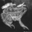

[[6]]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
width=32
height=32

print("Extract Histogram of Gradients features for training, validation and testing datasets:\n")
Xtrain_d0, Ytrain_d0 = get_hog_data(X_train,Y_train, width, height)
Xval_d0, Yval_d0 = get_hog_data(X_val,Y_val, width, height)
Xtest_d0, Ytest_d0 = get_hog_data(x_test,y_test, width, height)

**Q4**

In [1]:
from tensorflow.keras.datasets import mnist
((trainX, trainY), (testX, testY)) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
#we now have a 2D array with each index pixel intensities of the image as 1D array

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

print(trainX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
print(trainY)

[5 0 4 ... 5 6 8]
